In [1]:
import pandas as pd
import numpy as np
import folium

In [2]:
buoy_info = pd.read_csv("buoy_information.csv", header = None)

In [3]:
buoy_info.columns = ['buoy_name','depth','latitude','longitude']

In [4]:
buoy_info['buoy_name'] = buoy_info['buoy_name'].astype(int)

In [5]:
buoy_info.head(20)

,buoy_name,depth,latitude,longitude
0,28,366.501820,33.854929,-118.633477
1,29,549.913747,37.945814,-123.469251
2,36,40.146470,46.857478,-124.244542
3,43,20.000000,33.219940,-117.439445
4,45,225.587692,33.178806,-117.471486
5,67,288.285001,33.223483,-119.864341
6,71,476.349102,34.459735,-120.765927
7,76,25.496539,35.205726,-120.859604
8,81,53.000000,34.180000,-119.476669
9,87,35.000000,34.038334,-120.091667


In [6]:
buoy_info_array = np.asarray(buoy_info)

In [7]:
# buoy_info_array

In [8]:
us_center_latitude = 39.8281757358
us_center_longitude = -98.579500000

east_coast_focused_latitude = 40.71277600000
east_coast_focused_longitude = -74.005974000000

west_coast_focused_latitude = 37.77492900000
west_coast_focused_longitude = -122.41941800000


# Create a map centered at the given coordinates with a specific zoom level
# my_map = folium.Map(location=[us_center_latitude, us_center_longitude], zoom_start=5)  #### us center
# my_map = folium.Map(location=[east_coast_focused_latitude, east_coast_focused_longitude], zoom_start=5)  #### east coast center
my_map = folium.Map(location=[west_coast_focused_latitude, west_coast_focused_longitude], zoom_start=5)  #### west coast center

# List of coordinates
buoy_properties = []
for i in range(buoy_info_array.shape[0]):
    buoy_prop = (buoy_info_array[i][0], buoy_info_array[i][1], buoy_info_array[i][2], buoy_info_array[i][3])
    buoy_properties.append(buoy_prop)
    
# Add markers to the map
for entry in buoy_properties:
    
    buoy_num = entry[0]
    depth = entry[1]
    latitude = entry[2]
    longitude = entry[3]

    if depth < 20:
        color = "red"
        classification = "shallow"
    elif 20 <= depth <= 100:
        color = "orange"
        classification = "intermediate"
    else:
        color = "blue"
        classification = "deep"

    
    folium.Marker(
        location=[latitude, longitude],
        popup=folium.Popup(f'Buoy_number: {buoy_num.astype(int)}\n Depth: {classification}', parse_html=True),
        icon=folium.Icon(color=color)
    ).add_to(my_map)

# Save the map to an HTML file
my_map.save("west_coast_focused_buoys.html")

In [9]:
my_map

In [10]:
from geopy.distance import geodesic

chosen_deep_buoys = [67, 138, 167, 229, 234]
chosen_other_buoys = []

chosen_buoys = []
chosen_buoys.extend(chosen_deep_buoys[0:len(chosen_deep_buoys)])
chosen_buoys.extend(chosen_other_buoys[0:len(chosen_other_buoys)])

deep_buoys_lats = []
deep_buoys_longs = []
deep_buoys_depths = []

other_buoys_lats = []
other_buoys_longs = []
other_buoys_depths = []

for buoy in chosen_deep_buoys:
    index = np.where(buoy_info_array[:,0]==buoy)
    deep_buoys_lats.append(buoy_info_array[index,2])
    deep_buoys_longs.append(buoy_info_array[index,3])
    deep_buoys_depths.append(buoy_info_array[index,1])

deep_buoys_lats_array = np.asarray(deep_buoys_lats).reshape(len(chosen_deep_buoys),1)
deep_buoys_longs_array = np.asarray(deep_buoys_longs).reshape(len(chosen_deep_buoys),1)
deep_buoys_depths_array = np.asarray(deep_buoys_depths).reshape(len(chosen_deep_buoys),1)

for buoy in chosen_other_buoys:
    index = np.where(buoy_info_array[:,0]==buoy)
    other_buoys_lats.append(buoy_info_array[index,2])
    other_buoys_longs.append(buoy_info_array[index,3])
    other_buoys_depths.append(buoy_info_array[index,1])

other_buoys_lats_array = np.asarray(other_buoys_lats).reshape(len(chosen_other_buoys),1)
other_buoys_longs_array = np.asarray(other_buoys_longs).reshape(len(chosen_other_buoys),1)
other_buoys_depths_array = np.asarray(other_buoys_depths).reshape(len(chosen_other_buoys),1)

In [11]:
chosen_buoys_lats = []
chosen_buoys_longs = []
chosen_buoys_depths = []

for buoy in chosen_buoys:
    index = np.where(buoy_info_array[:,0]==buoy)
    chosen_buoys_lats.append(buoy_info_array[index,2])
    chosen_buoys_longs.append(buoy_info_array[index,3])
    chosen_buoys_depths.append(buoy_info_array[index,1])

chosen_buoys_lats_array = np.asarray(chosen_buoys_lats).reshape(len(chosen_buoys),1)
chosen_buoys_longs_array = np.asarray(chosen_buoys_longs).reshape(len(chosen_buoys),1)
chosen_buoys_depths_array = np.asarray(chosen_buoys_depths).reshape(len(chosen_buoys),1)

In [12]:
chosen_buoys

[67, 138, 167, 229, 234]

In [13]:
buoy_locs = []
for i in range(len(chosen_buoys)):
    buoy_locs.append((chosen_buoys_lats_array[i], chosen_buoys_longs_array[i]))

distances = []
for i in range(len(chosen_buoys)):
    distance_buoy = []
    for j in range(len(chosen_buoys)):
        distance_buoy.append(geodesic(buoy_locs[i], buoy_locs[j]).kilometers)
    distances.append(distance_buoy)

distance_array = np.asarray(distances)

In [14]:
buoy_locs

[(array([33.22348254]), array([-119.86434146])),
 (array([33.40002823]), array([-119.65145874])),
 (array([33.43467712]), array([-119.47433217])),
 (array([33.17490005]), array([-118.96170044])),
 (array([33.70000076]), array([-119.01000214]))]

In [15]:
buoy_locs_tuples = [(float(lat), float(lon)) for lat, lon in buoy_locs]
print(buoy_locs_tuples)

[(33.22348254067557, -119.86434146336146), (33.400028228759766, -119.65145874023436), (33.43467712402344, -119.47433217366536), (33.17490005493164, -118.96170043945312), (33.70000076293945, -119.01000213623045)]


C:\Users\schakr18\AppData\Local\Temp\ipykernel_17800\2064586248.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  buoy_locs_tuples = [(float(lat), float(lon)) for lat, lon in buoy_locs]


In [16]:
distance_array

array([[ 0.        , 27.8640595 , 43.21115197, 84.33667906, 95.39971834],
       [27.8640595 ,  0.        , 16.91695264, 68.93124533, 68.23273637],
       [43.21115197, 16.91695264,  0.        , 55.76179501, 52.19930812],
       [84.33667906, 68.93124533, 55.76179501,  0.        , 58.41304822],
       [95.39971834, 68.23273637, 52.19930812, 58.41304822,  0.        ]])

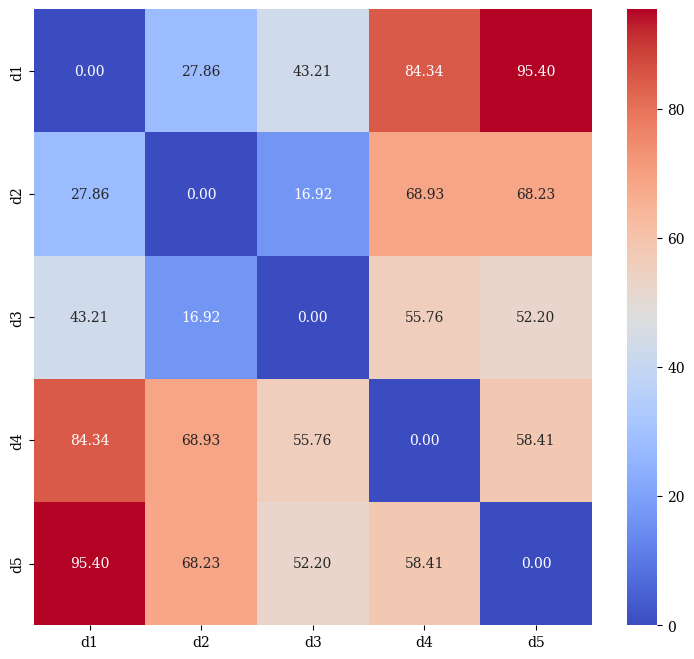

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

distance_df = pd.DataFrame(distance_array)
distance_df.index = ['d1','d2','d3','d4','d5']
distance_df.columns = ['d1','d2','d3','d4','d5']

plt.rcParams["font.family"]="serif"
plt.figure(figsize=[9,8])
sns.heatmap(distance_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.savefig("buoy_distances_localized.png", dpi=225)
plt.show()


In [18]:
import statistics

In [19]:
sum_lats = []
sum_longs = []

for i in range(len(buoy_locs_tuples)):
    sum_lats.append(buoy_locs_tuples[i][0])
    sum_longs.append(buoy_locs_tuples[i][1])

map_center = [statistics.mean(sum_lats), statistics.mean(sum_longs)]

In [20]:
map = folium.Map(location=map_center, zoom_start=10)

# Add markers for each point
for i in range(len(chosen_buoys)):
    if i <=4:
        color = 'darkblue'
    else:
        color = 'lightred'
    folium.Marker(location=buoy_locs[i],  
                icon=folium.Icon(color=color, icon='globe', size=(10,10)),
                popup=folium.Popup(f'Buoy_number: {chosen_buoys[i]}\n Depth: { float(chosen_buoys_depths[i])}', max_width = 300, parse_html=True),
            ).add_to(map)

for i in range(len(chosen_buoys)):
    if i <=4:
        entry = f'd{i+1}'
    else:
        entry = f's{i-4}'
    folium.Marker(location=buoy_locs[i],
                # popup=folium.Popup(f'Buoy_number: {chosen_deep_buoys[i]}\n Depth: { float(deep_buoys_depths[i])}', parse_html=True),
                icon=folium.DivIcon(
                    html=f'<div style="font-size: 12pt; color: black;">{entry}</div>'
                 )
            ).add_to(map)

# Add a line between the two points
for i in range(len(buoy_locs)-1):
    for j in range(i+1, len(buoy_locs)):
        folium.PolyLine([buoy_locs_tuples[i], buoy_locs_tuples[j]], color="blue"\
                        , weight=0.7, opacity=0.6, dash_array='5, 3').add_to(map)

# Add a popup showing the distance
for i in range(distance_array.shape[0]-1):
    for j in range(i+1, distance_array.shape[1]):
        folium.Marker(
            location=[(buoy_locs_tuples[i][0] + buoy_locs_tuples[j][0])/2, (buoy_locs_tuples[i][1] + buoy_locs_tuples[j][1])/2],
            popup=f'Distance: {distance_array[i,j]:.2f} km',
            icon=folium.DivIcon(
                html=f'<div style="font-size: 12pt; color: black;">{distance_array[i,j]:.2f} km</div>'
            )
        ).add_to(map)

# # Save the map to an HTML file or display it
map.save('all_water_buoys_with_distance.html')
# # To display in Jupyter Notebook, use:
map

C:\Users\schakr18\AppData\Local\Temp\ipykernel_17800\4041662436.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  popup=folium.Popup(f'Buoy_number: {chosen_buoys[i]}\n Depth: { float(chosen_buoys_depths[i])}', max_width = 300, parse_html=True),


In [21]:
color=[random.random(), random.random(), random.random()]
color

NameError: name 'random' is not defined

In [ ]:
import folium


# Define the coordinates of the two points
point1 = (40.748817, -73.985428)  # Example: New York, USA (Latitude, Longitude)
point2 = (48.8566, 2.3522)        # Example: Paris, France (Latitude, Longitude)

# Calculate the distance between the points
distance = geodesic(point1, point2).kilometers

# Create a Folium map centered between the two points
map_center = [(point1[0] + point2[0]) / 2, (point1[1] + point2[1]) / 2]
map = folium.Map(location=map_center, zoom_start=4)

# Add markers for each point
folium.Marker(location=point1, popup='New York, USA').add_to(map)
folium.Marker(location=point2, popup='Paris, France').add_to(map)

# Add a line between the two points
folium.PolyLine([point1, point2], color='blue', weight=2.5, opacity=1).add_to(map)

# Add a popup showing the distance
folium.Marker(
    location=map_center,
    popup=f'Distance: {distance:.2f} km',
    icon=folium.DivIcon(
        html=f'<div style="font-size: 12pt; color: black;">Distance: {distance:.2f} km</div>'
    )
).add_to(map)

# Save the map to an HTML file or display it
map.save('map_with_distance.html')
# To display in Jupyter Notebook, use:
# map

